In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset/avocado.csv")

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 252.967
Date:                Wed, 14 Dec 2022   AIC                           -499.935
Time:                        18:28:58   BIC                           -490.563
Sample:                    01-04-2015   HQIC                          -496.131
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3565      1.167      0.306      0.760      -1.930       2.643
ma.L1         -0.4089      1.147     -0.357      0.721      -2.656       1.838
sigma2         0.0029      0.000     10.736      0.0

/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


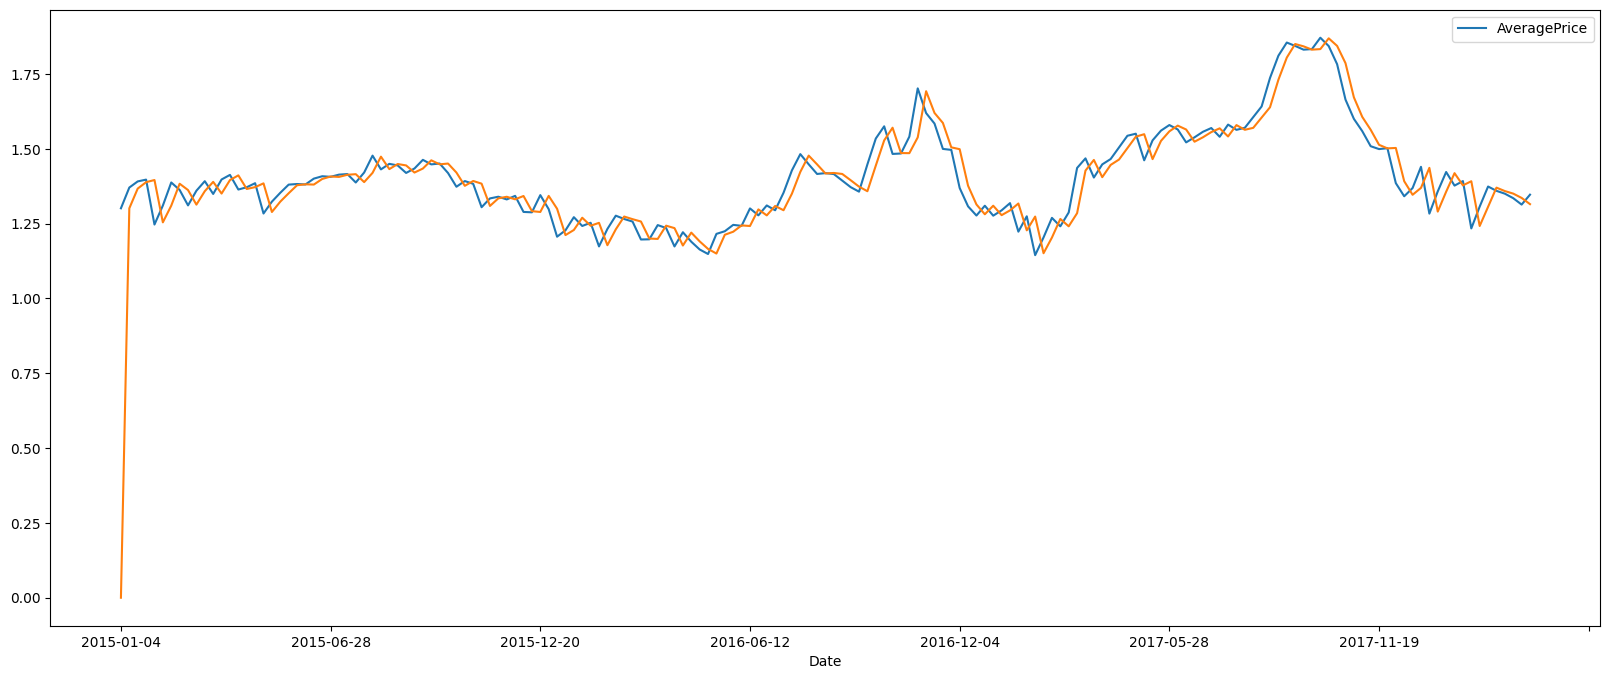

In [3]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data.groupby('Date')['AveragePrice'].mean(), order=(1, 1, 1))
modelFit = model.fit()
print(modelFit.summary())
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)
val = modelFit.predict()
plt.plot(ts['Date'], val)

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 2, 1)   Log Likelihood                 248.159
Date:                Wed, 14 Dec 2022   AIC                           -490.318
Time:                        18:29:29   BIC                           -480.964
Sample:                    01-04-2015   HQIC                          -486.522
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0176      0.071     -0.247      0.805      -0.157       0.122
ma.L1         -0.9977      0.150     -6.658      0.000      -1.291      -0.704
sigma2         0.0029      0.000      6.651      0.0

/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

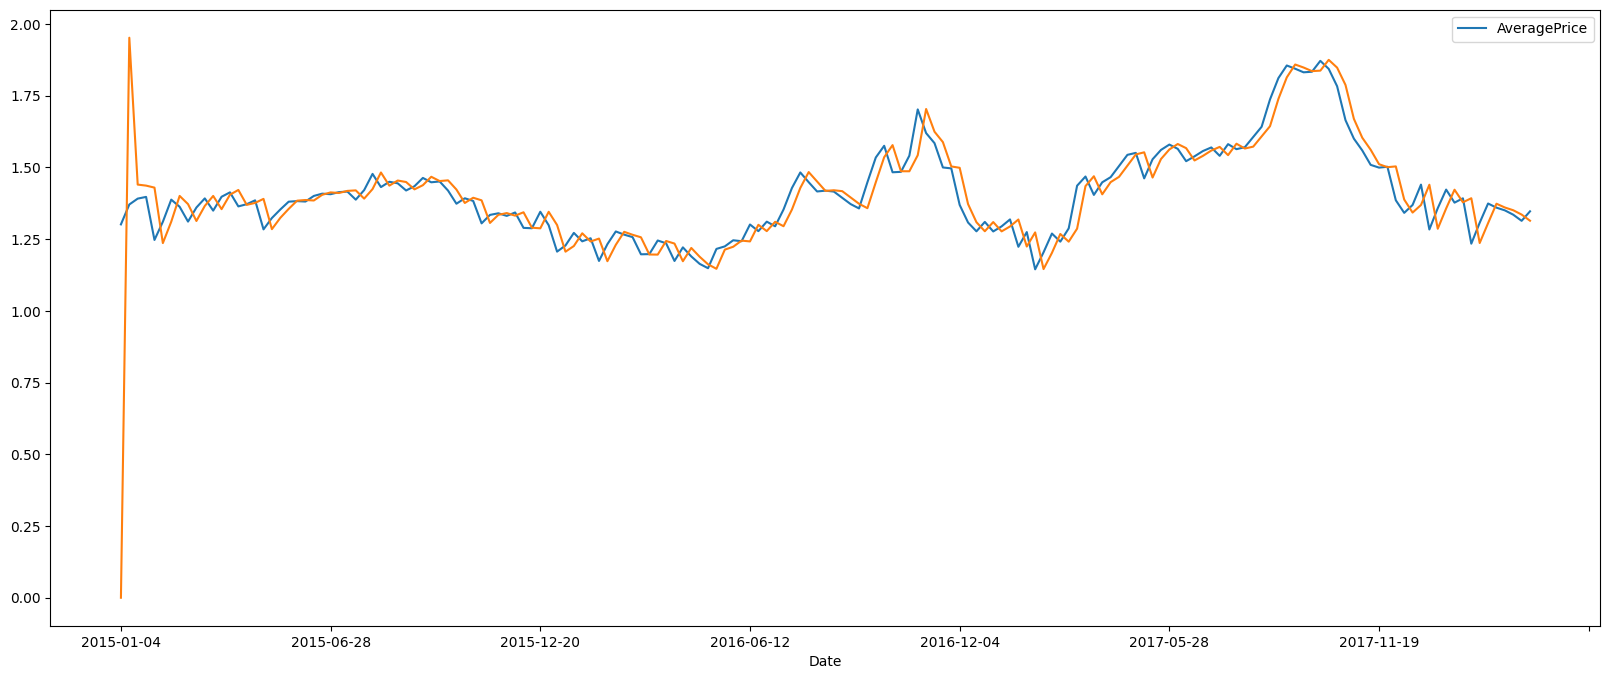

In [4]:
model = ARIMA(data.groupby('Date')['AveragePrice'].mean(), order=(1, 2, 1))
modelFit = model.fit()
print(modelFit.summary())
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)
val = modelFit.predict()
plt.plot(ts['Date'], val)

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  169
Model:                 ARIMA(1, 3, 1)   Log Likelihood                 205.445
Date:                Wed, 14 Dec 2022   AIC                           -404.890
Time:                        18:29:36   BIC                           -395.554
Sample:                    01-04-2015   HQIC                          -401.100
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4456      0.060     -7.465      0.000      -0.563      -0.329
ma.L1         -0.9935      0.194     -5.115      0.000      -1.374      -0.613
sigma2         0.0048      0.001      4.408      0.0

/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/sivansh/programming/automation-ai/assignment-2/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


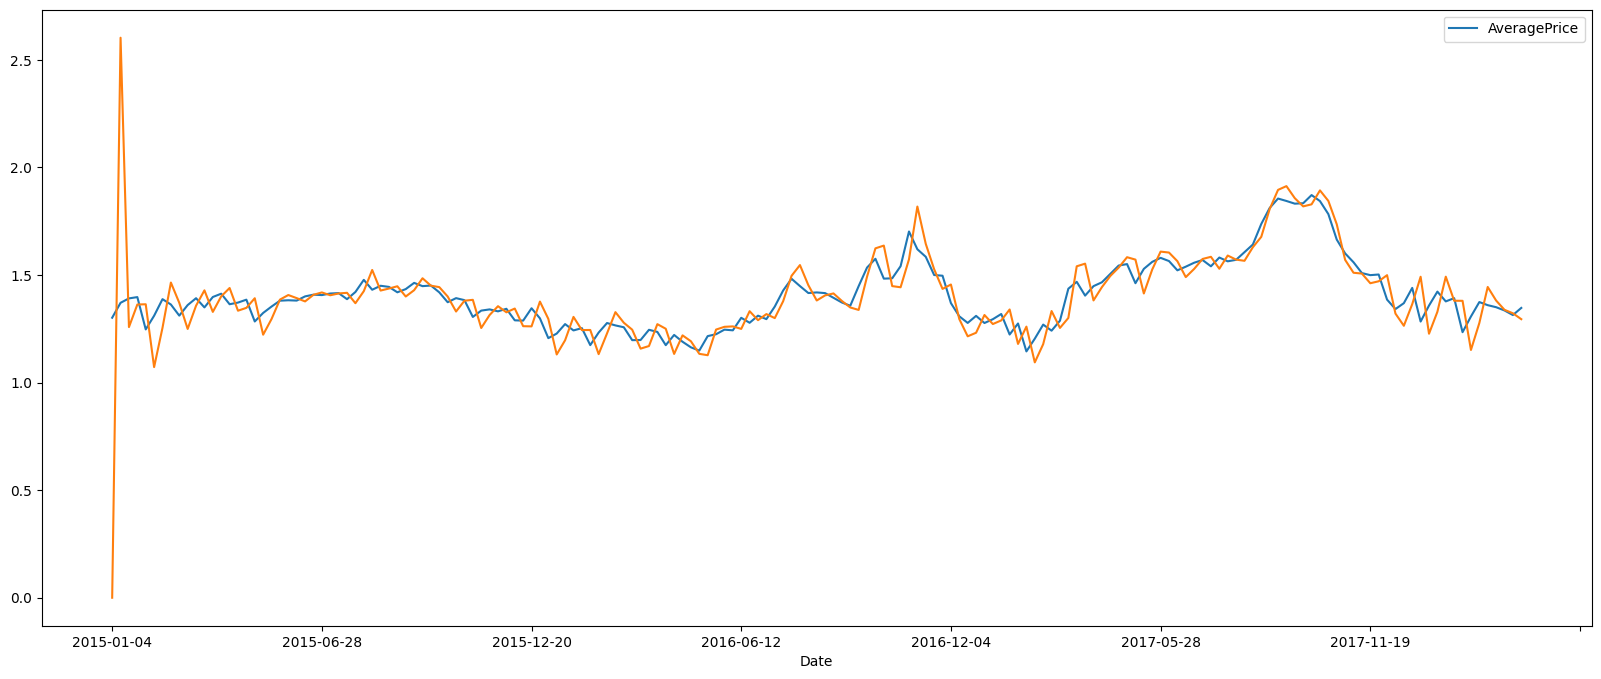

In [5]:
model = ARIMA(data.groupby('Date')['AveragePrice'].mean(), order=(1, 3, 1))
modelFit = model.fit()
print(modelFit.summary())
ts = data.groupby('Date')['AveragePrice'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ts.set_index('Date').plot(ax=ax)
val = modelFit.predict()
plt.plot(ts['Date'], val)